<a href="https://colab.research.google.com/github/DEKDEGUE-Hajar/Intelligent-SIEM-Security-Information-and-Event-Management-/blob/main/EDA_CIC_IDS2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA - Dataset (CIC-IDS2017)**


## 1. Overview of the Dataset


- **CIC-IDS2017**  dataset contains network traffic data for the development and evaluation of intrusion detection systems. The dataset is designed to be representative of modern network traffic and includes more than 3.1 million network packets captured over a period of seven days in a real network environment. The dataset includes normal traffic and seven different attack scenarios: Brute Force, Heartbleed, Botnet, DoS, DDoS, Web Attack and Infiltration. The dataset is highly imbalanced. The majority of records belongs to the 'Benign' class and relatively few records belongs to the other classes. The dataset consists of 3119345 rows and 79 columns. In these columns, 85 of them are features that are numerical and the 'label' column is categorical.

- **Dataset link** : https://www.kaggle.com/datasets/sateeshkumar6289/cicids-2017-dataset

## 2. Exploratory Data Analysis

### 2.1 Load, View Data and Show Analysis on Rows and Columns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
import joblib

In [ ]:
# Loading the dataset
data1 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='latin1')
data5 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

<ipython-input-3-998537f932df>:5: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  data4 = pd.read_csv('/content/drive/MyDrive/SIEM_project/CICIDS2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='latin1')


In [ ]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 85 columns
Data2 -> 445909 rows, 85 columns
Data3 -> 692703 rows, 85 columns
Data4 -> 458968 rows, 85 columns
Data5 -> 288602 rows, 85 columns
Data6 -> 191033 rows, 85 columns
Data7 -> 286467 rows, 85 columns
Data8 -> 225745 rows, 85 columns


In [ ]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 3119345
Number of columns: 85
Total cells: 265144325


In [ ]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [ ]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [ ]:
data.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3119345 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  float64
 3   Destination IP               object 
 4   Destination Port             float64
 5   Protocol                     float64
 6   Timestamp                    object 
 7   Flow Duration                float64
 8   Total Fwd Packets            float64
 9   Total Backward Packets       float64
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  Bwd Pa

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Source Port,2830743.0,4.112886e+04,2.229494e+04,0.000000e+00,32774.000000,50944.000000,5.841300e+04,6.553500e+04
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Protocol,2830743.0,9.880341e+00,5.261922e+00,0.000000e+00,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03


In [ ]:
pd.options.display.max_columns = 80
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,03/07/2017 08:56:22,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,245.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80.0,192.168.10.15,61374.0,6.0,7/7/2017 5:02,61.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### 2.2 Data Cleaning









### Dropping useless columns

In [ ]:
columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Protocol','Destination Port','Source Port','Timestamp']

# Dropping the columns
data = data.drop(columns=columns_to_drop)

KeyError: "['Flow ID', 'Source IP', 'Destination IP', 'Protocol', 'Destination Port', 'Source Port', 'Timestamp'] not found in axis"

In [ ]:
data.shape

(3119345, 78)

#### Identifying duplicate values


In [ ]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 884977


In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(2234368, 78)

#### Identifying missing values


In [ ]:
pd.set_option('display.max_rows', None)

missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Duration                    1
Total Fwd Packets                1
Total Backward Packets           1
Total Length of Fwd Packets      1
Total Length of Bwd Packets      1
Fwd Packet Length Max            1
Fwd Packet Length Min            1
Fwd Packet Length Mean           1
Fwd Packet Length Std            1
Bwd Packet Length Max            1
Bwd Packet Length Min            1
Bwd Packet Length Mean           1
Bwd Packet Length Std            1
Flow Bytes/s                   239
Flow Packets/s                   1
Flow IAT Mean                    1
Flow IAT Std                     1
Flow IAT Max                     1
Flow IAT Min                     1
Fwd IAT Total                    1
Fwd IAT Mean                     1
Fwd IAT Std                      1
Fwd IAT Max                      1
Fwd IAT Min                      1
Bwd IAT Total                    1
Bwd IAT Mean                     1
Bwd IAT Std                      1
Bwd IAT Max                      1
Bwd IAT Min         

In [ ]:
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      561
Flow Packets/s    799
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 316
Missing values after processing infinite values: 1676


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Duration                  1
Total Fwd Packets              1
Total Backward Packets         1
Total Length of Fwd Packets    1
Total Length of Bwd Packets    1
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 78, dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(6)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                             Missing Values  Percentage of Total Values
Flow Duration                             1                    0.000045
Total Fwd Packets                         1                    0.000045
Total Backward Packets                    1                    0.000045
Total Length of Fwd Packets               1                    0.000045
Total Length of Bwd Packets               1                    0.000045
...                                     ...                         ...
Idle Mean                                 1                    0.000045
Idle Std                                  1                    0.000045
Idle Max                                  1                    0.000045
Idle Min                                  1                    0.000045
Label                                     1                    0.000045

[78 rows x 2 columns]


#### Dealing with missing values (Columns with missing data)

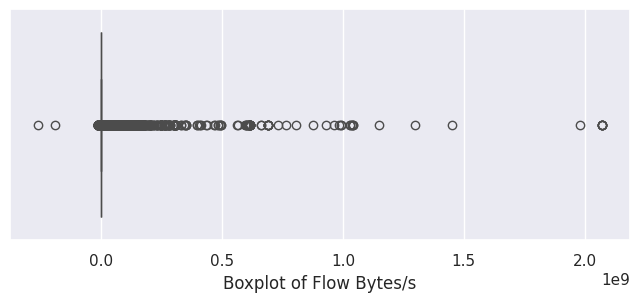

In [ ]:
# Reset the index of the DataFrame to ensure unique index values
data = data.reset_index(drop=True)

# Now, you can create the boxplot
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

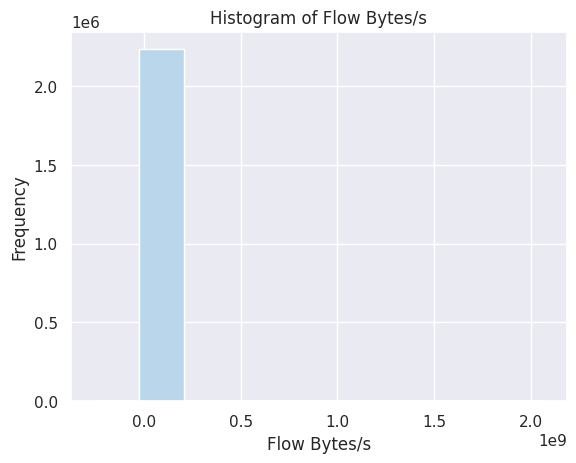

In [ ]:
colors = sns.color_palette('Blues')
plt.hist(data['Flow Bytes/s'], color = colors[1])
plt.title('Histogram of Flow Bytes/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Frequency')
plt.show()

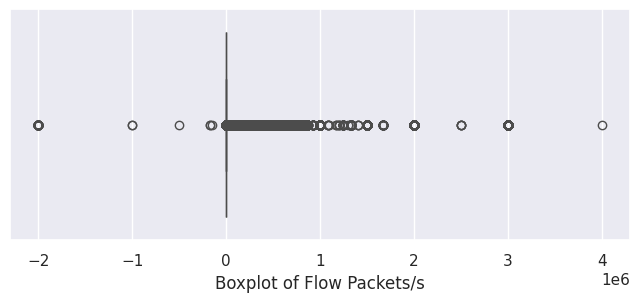

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = data['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()

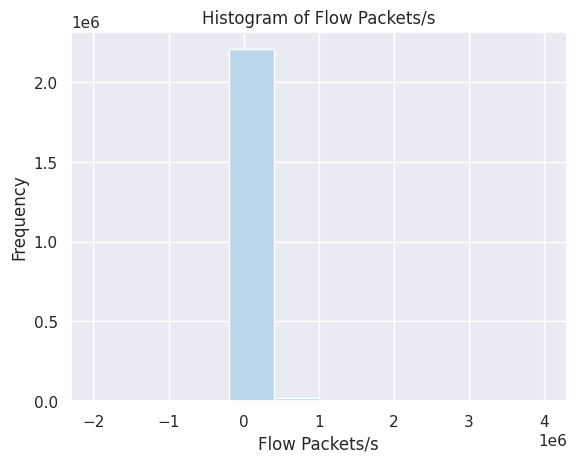

In [ ]:
plt.hist(data['Flow Packets/s'], color = colors[1])
plt.title('Histogram of Flow Packets/s')
plt.xlabel('Flow Packets/s')
plt.ylabel('Frequency')
plt.show()

In [ ]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  2864.3861185
Median of Flow Packets/s:  53.142163255


In [ ]:
# Filling missing values with median
data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

<ipython-input-20-c500efc82597>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
<ipython-input-20-c500efc82597>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow Duration                  1
Total Fwd Packets              1
Total Backward Packets         1
Total Length of Fwd Packets    1
Total Length of Bwd Packets    1
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 76, dtype: int64


In [ ]:
# Drop rows with any missing values
data = data.dropna()

In [ ]:
data.shape

(2234367, 78)

In [ ]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Series([], dtype: int64)


In [ ]:
data.shape

(2234367, 78)

- The first step is to identify duplicate rows and missing or invalid values. We
identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

- Flow Bytes/s and Flow Packets/s are continuous variables. We can see from the Flow Bytes/s and Flow Packets/s histogram and box plot that the majority of values are towards one area which indicates that the data is not normally distributed. The box plot of the Flow Bytes/s and Flow Packets/s shows that the variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plotting Heat Map

In [ ]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack \x96 Brute Force', 'Web Attack \x96 XSS',
       'Web Attack \x96 Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [ ]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

,count
Label,
BENIGN,1897862
DoS Hulk,172849
DDoS,128016
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219
PortScan,1958


In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack  Brute Force': 'Web Attack',
    'Web Attack  XSS': 'Web Attack',
    'Web Attack  Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

<ipython-input-28-42d79d393397>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attack Type'] = data['Label'].map(attack_map)


In [ ]:
data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,1897862
DoS,193748
DDoS,128016
Brute Force,9152
Web Attack,2143
Port Scan,1958
Bot,1441
Infiltration,36
Heartbleed,11


In [ ]:
data.drop('Label', axis = 1, inplace = True)

<ipython-input-30-c36fb24a240b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Label', axis = 1, inplace = True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


<ipython-input-31-3425ae0de609>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Attack Number'] = le.fit_transform(data['Attack Type'])


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

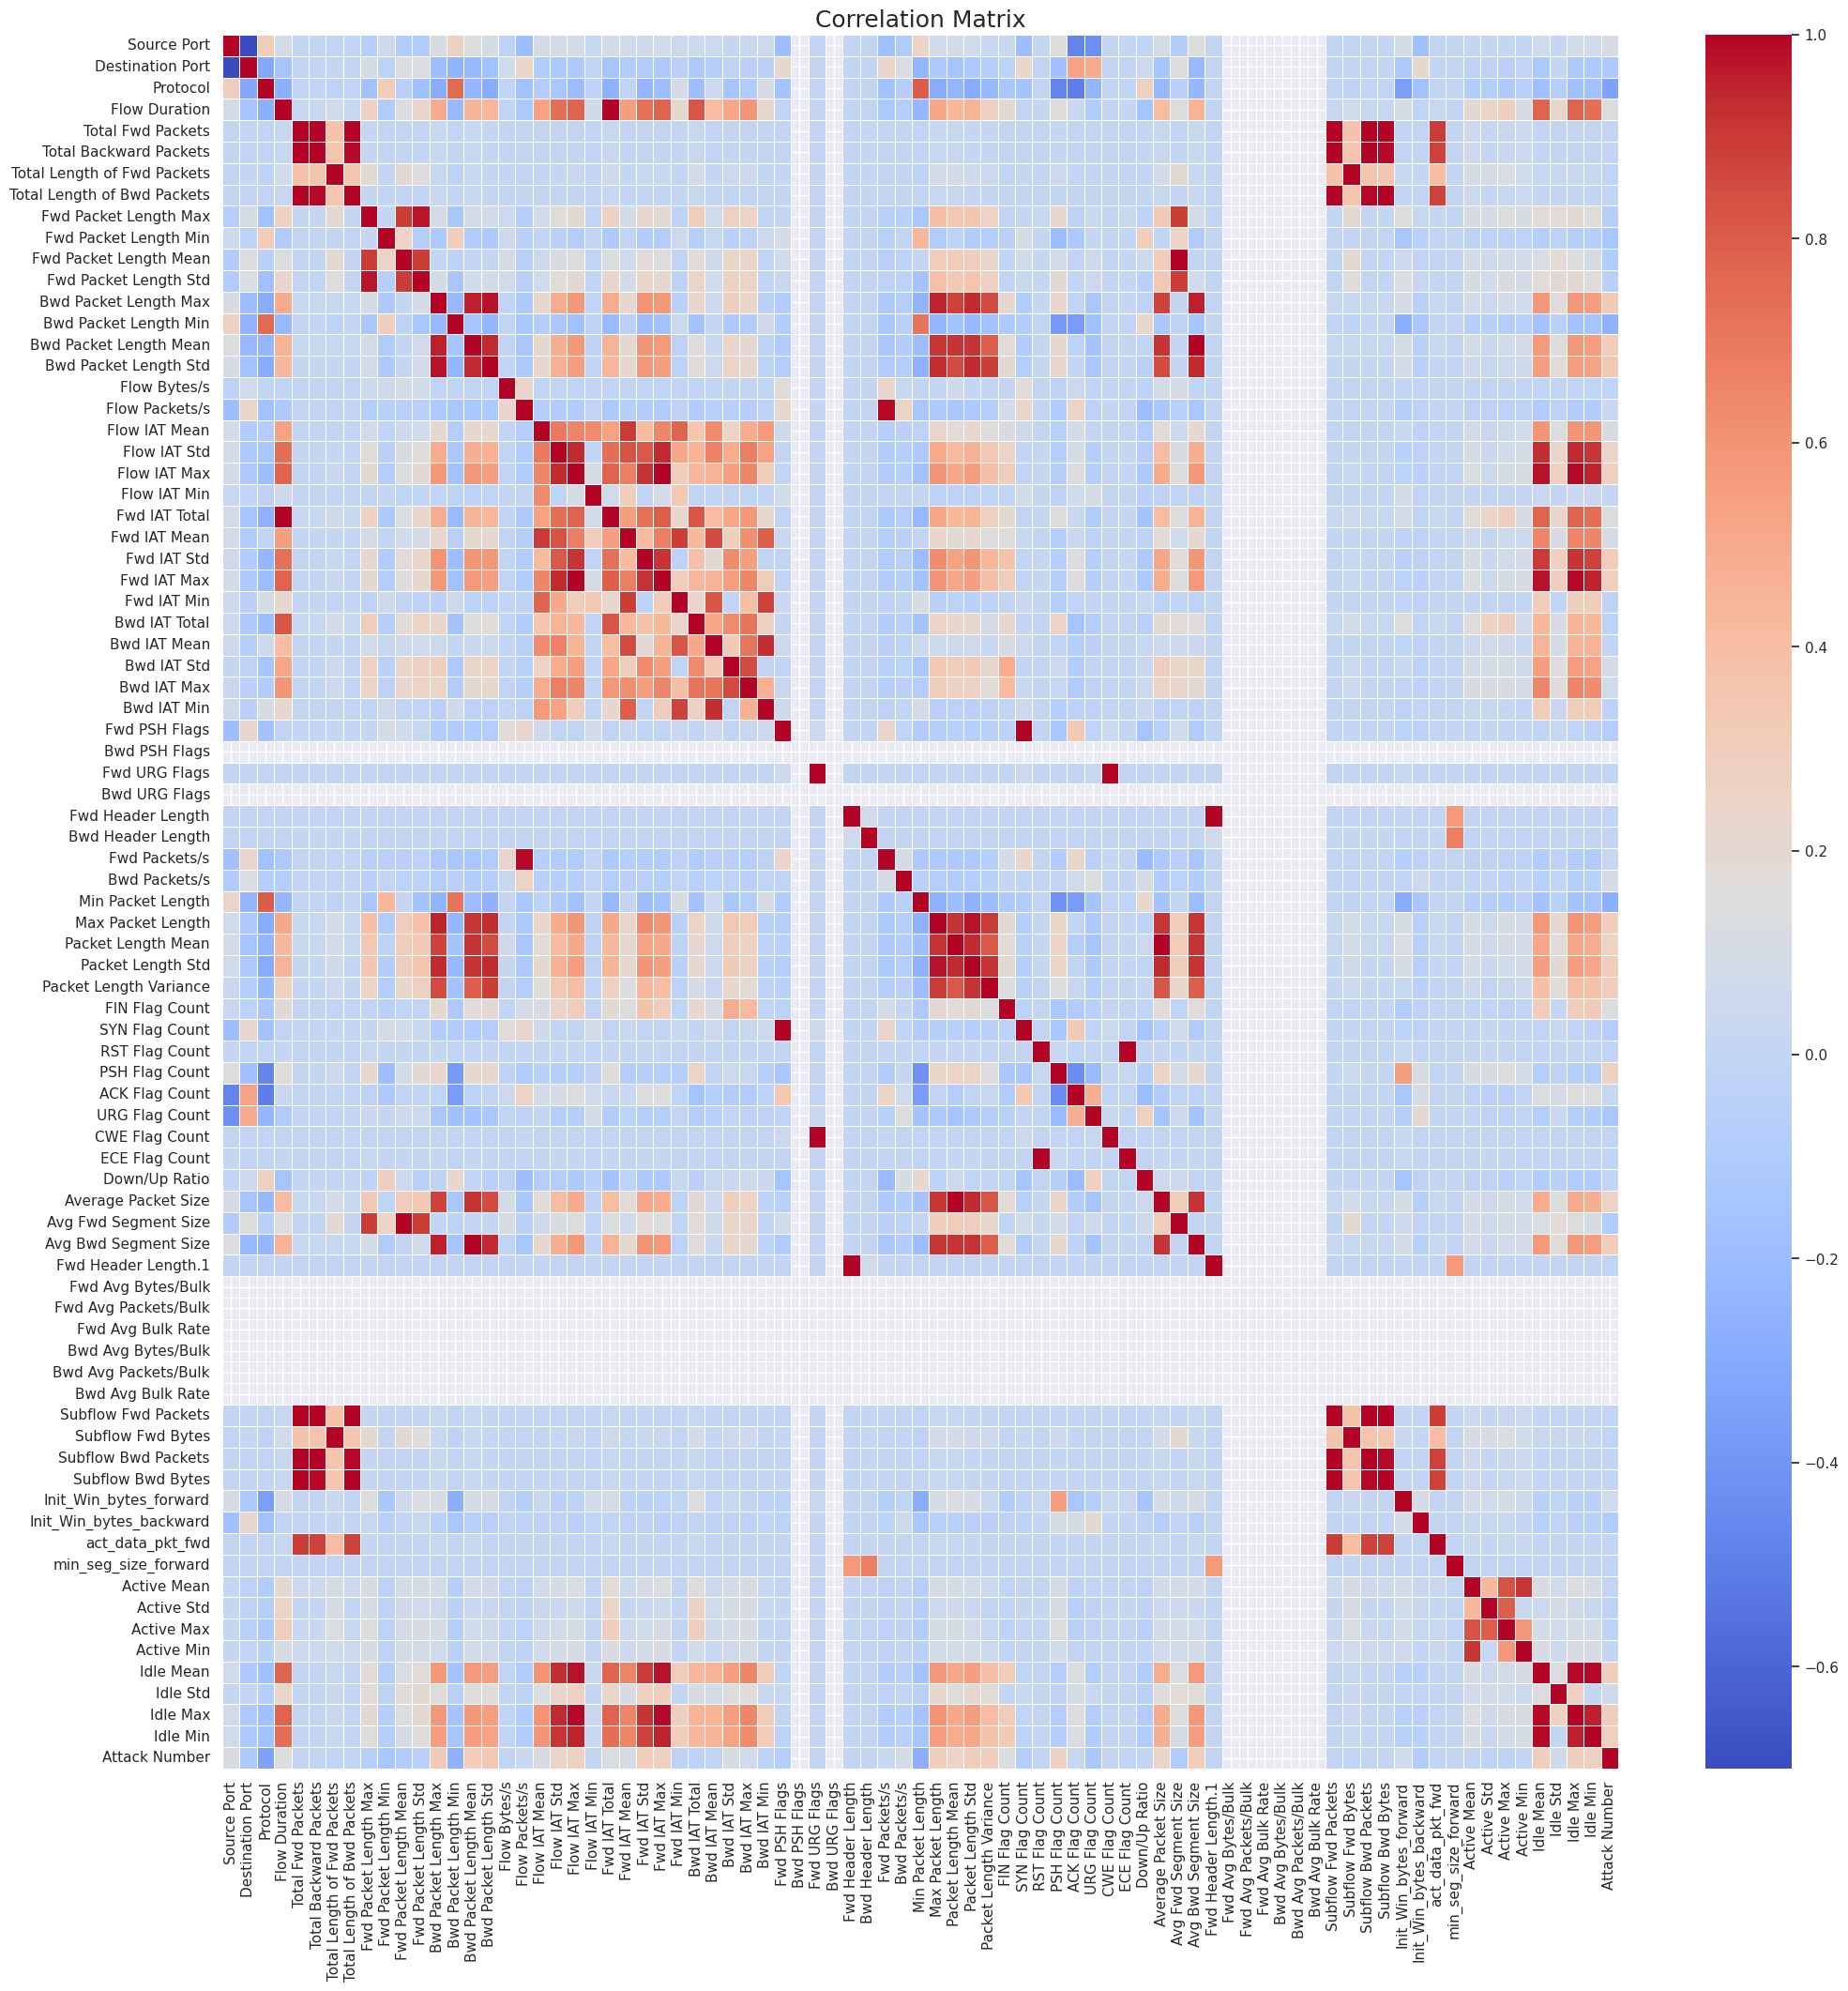

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Source Port              :0.12
2.  Flow Duration            :0.14
3.  Bwd Packet Length Max    :0.32
4.  Bwd Packet Length Mean   :0.31
5.  Bwd Packet Length Std    :0.34
6.  Flow Packets/s           :0.03
7.  Flow IAT Mean            :0.12
8.  Flow IAT Std             :0.24
9.  Flow IAT Max             :0.28
10. Flow IAT Min             :0.01
11. Fwd IAT Total            :0.14
12. Fwd IAT Mean             :0.1
13. Fwd IAT Std              :0.31
14. Fwd IAT Max              :0.28
15. Bwd IAT Std              :0.11
16. Bwd IAT Max              :0.07
17. Fwd Packets/s            :0.02
18. Bwd Packets/s            :0.09
19. Max Packet Length        :0.29
20. Packet Length Mean       :0.25
21. Packet Length Std        :0.3
22. Packet Length Variance   :0.29
23. FIN Flag Count           :0.14
24. PSH Flag Count           :0.27
25. ACK Flag Count           :0.02
26. Average Packet Size      :0.25
27. Avg Bwd Segment Size     :0.31

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

NameError: name 'pos_corr_features' is not defined

In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

- We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

- For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

- The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [ ]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, data[feature].nunique()))

Unique value count for: 
1.  Flow Duration                 : 1050899
2.  Total Fwd Packets             : 1432
3.  Total Backward Packets        : 1747
4.  Total Length of Fwd Packets   : 17928
5.  Total Length of Bwd Packets   : 64698
6.  Fwd Packet Length Max         : 5279
7.  Fwd Packet Length Min         : 384
8.  Fwd Packet Length Mean        : 109091
9.  Fwd Packet Length Std         : 254384
10. Bwd Packet Length Max         : 4838
11. Bwd Packet Length Min         : 583
12. Bwd Packet Length Mean        : 154284
13. Bwd Packet Length Std         : 249206
14. Flow Bytes/s                  : 1595244
15. Flow Packets/s                : 1242273
16. Flow IAT Mean                 : 1170377
17. Flow IAT Std                  : 1057046
18. Flow IAT Max                  : 580289
19. Flow IAT Min                  : 136316
20. Fwd IAT Total                 : 493098
21. Fwd IAT Mean                  : 738963
22. Fwd IAT Std                   : 700372
23. Fwd IAT Max                   : 4373

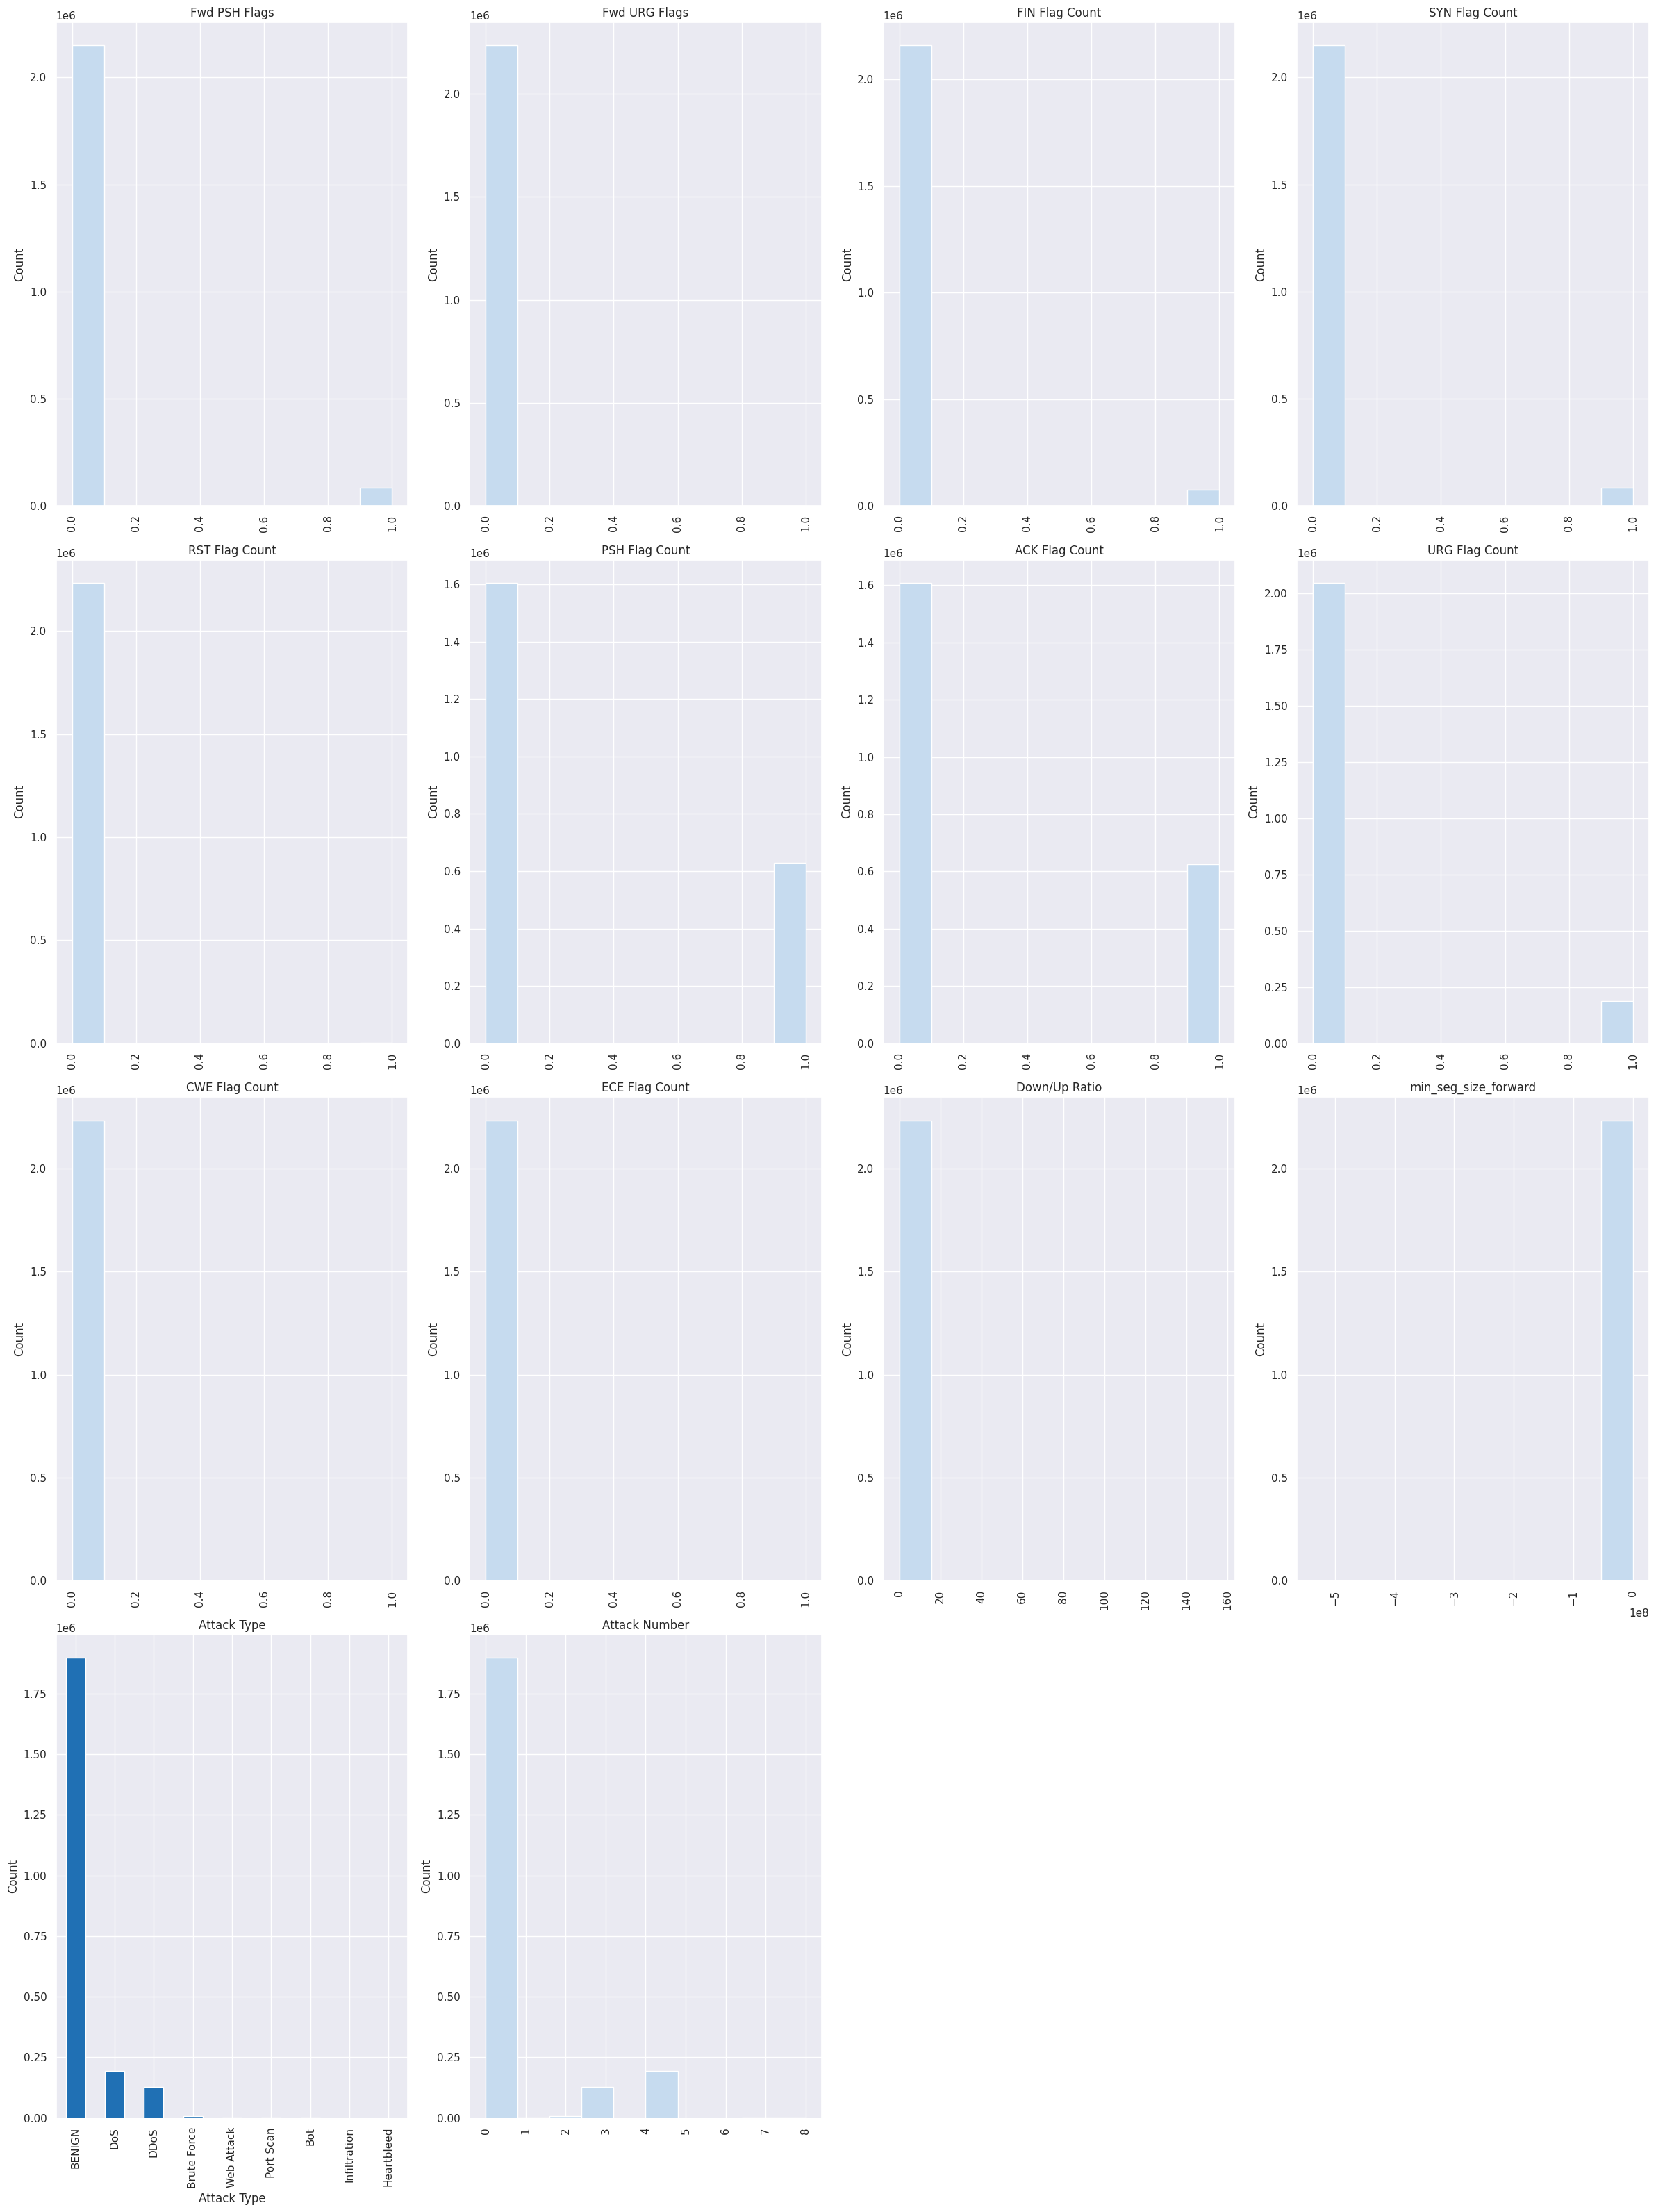

In [ ]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = data.nunique()
selected_cols = data[[col for col in data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for sampled data
corr_matrix = data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

In [ ]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher
cols = list(data.columns)[:-2]
high_corr_pairs = []
corr_th = 0.85

for i in range(len(cols)):
  for j in range(i + 1, len(cols)):
    val = data[cols[i]].corr(data[cols[j]])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, cols[i], cols[j]))

size, cols = len(high_corr_pairs), 4
rows, rem =  size // cols, size % cols
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols, figsize = (24, int(size * 1.7)))
for i in range(rows):
    for j in range(cols):
      try:
        val, x, y = high_corr_pairs[i * cols + j]
        if val > 0.99:
          axs[i, j].scatter(data[x], data[y], color = 'green', alpha = 0.1)
        else:
          axs[i, j].scatter(data[x], data[y], color = 'blue', alpha = 0.1)
        axs[i, j].set_xlabel(x)
        axs[i, j].set_ylabel(y)
        axs[i, j].set_title(f'{x} vs\n{y} ({val:.2f})')
      except IndexError:
        fig.delaxes(axs[i, j])

fig.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


KeyboardInterrupt: 

In [ ]:
data.drop('Attack Number', axis = 1, inplace = True)

In [ ]:
# Identifying outliers
numeric_data = data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Flow Duration                       463068               20.72
Total Fwd Packets                   216145                9.67
Total Backward Packets              209898                9.39
Total Length of Fwd Packets         301730               13.50
Total Length of Bwd Packets         351022               15.71
...                                    ...                 ...
Active Min                          554423               24.81
Idle Mean                           283009               12.67
Idle Std                            229243               10.26
Idle Max                            284745               12.74
Idle Min                            254785               11.40

[77 rows x 2 columns]


In [ ]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in data['Attack Type'].unique():
        attack_data = data[i][data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Source Port
- BENIGN: 0 (0.00%)
- DoS: 0 (0.00%)
- Port Scan: 1 (0.00%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Destination Port
- BENIGN: 97596 (21.58%)
- DoS: 0 (0.00%)
- Port Scan: 3866 (12.06%)
- DDoS: 0 (0.00%)
- Brute Force: 1 (0.04%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Protocol
- BENIGN: 0 (0.00%)
- DoS: 0 (0.00%)
- Port Scan: 1 (0.00%)
- DDoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Bot: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 104194 (23.04%)
- DoS: 0 (0.00%)
- Port Scan: 3414 (10.65%)
- DDoS: 4322 (16.80%)
- Brute Force: 0 (0.00%)
- Bot: 99 (24.32%)
- Web Attack: 74 (16.78%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 77998 (17.24%)
- DoS: 461 (0.94%)
- Port Scan: 259 (0.81%)
- DDoS: 8

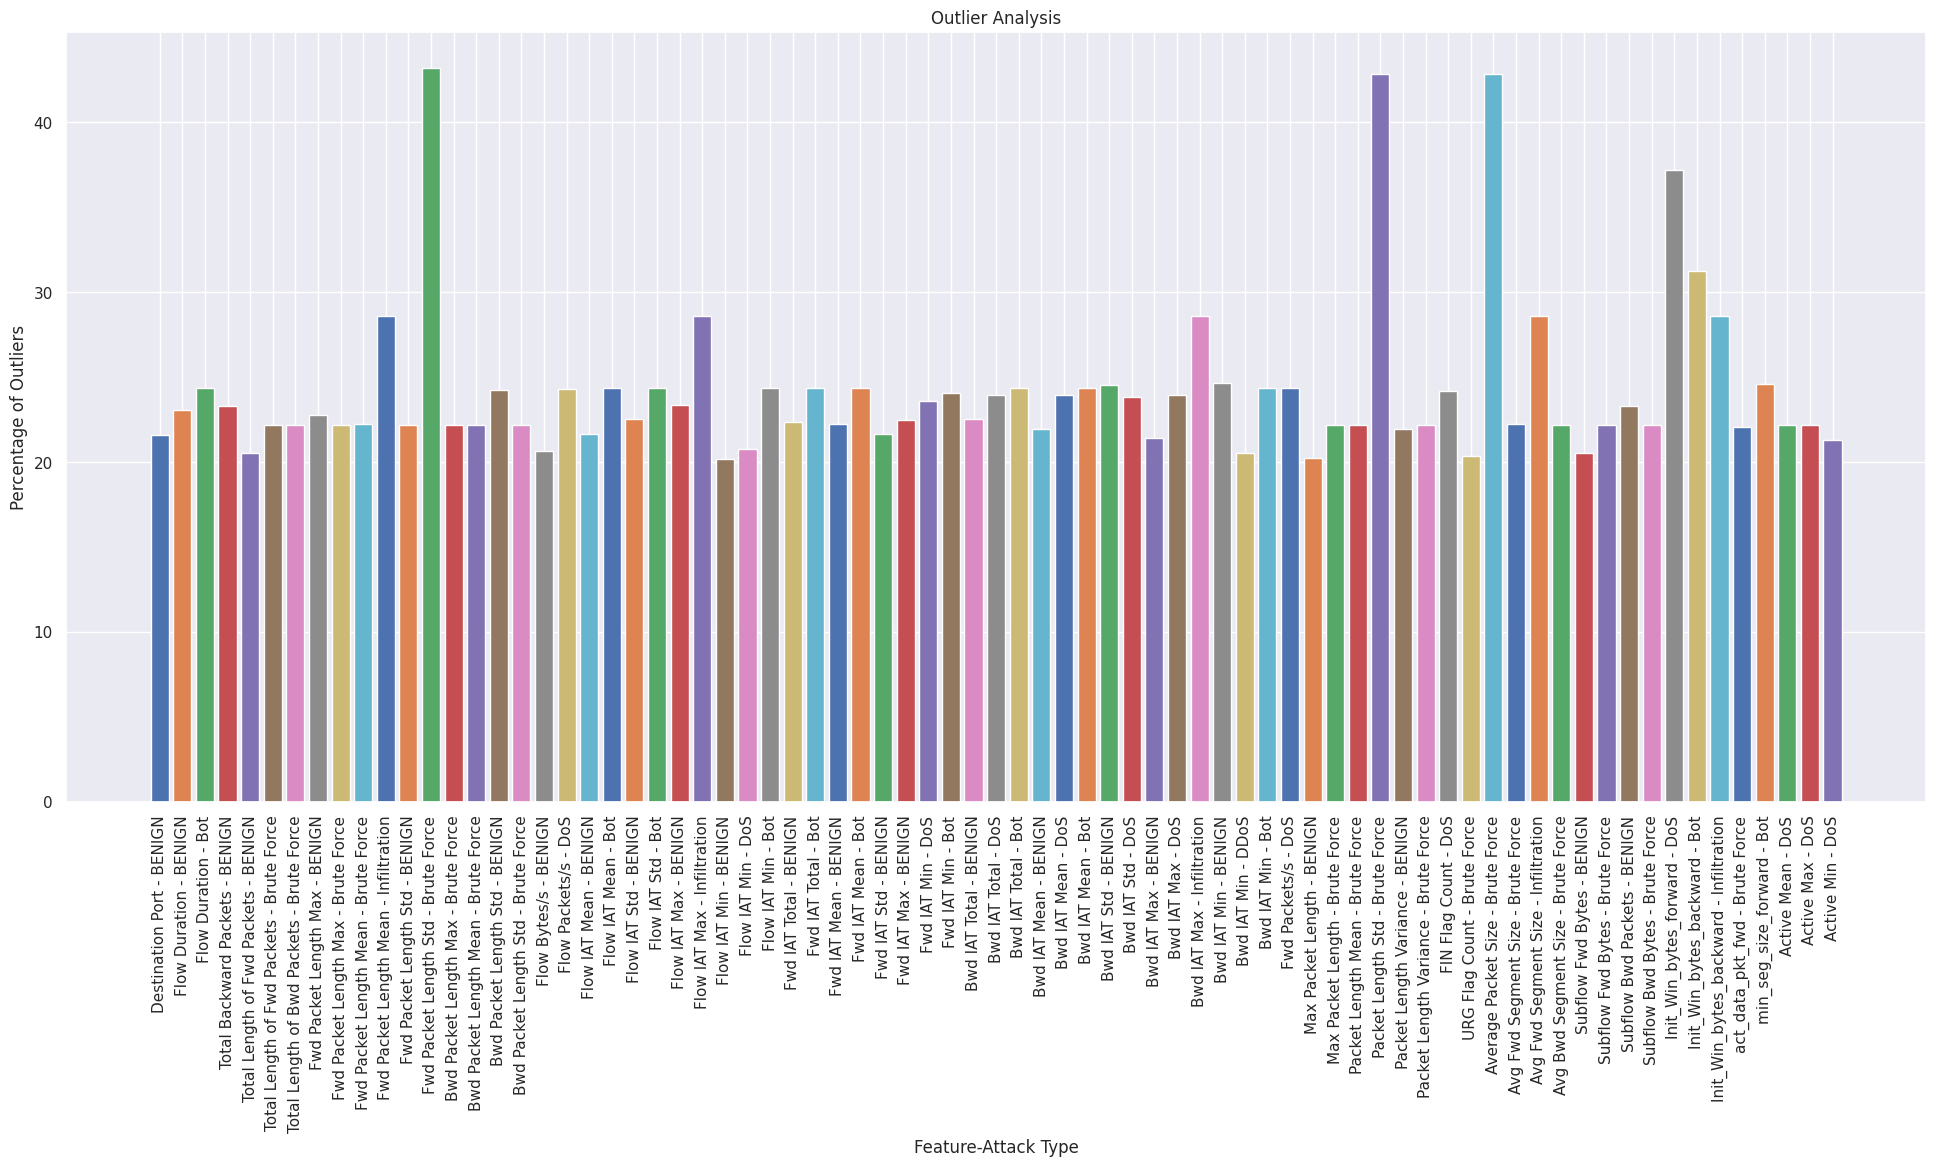

In [ ]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

- As we have a large dataset, it was both time-consuming and computationally expensive to do all the analysis on the original-sized dataset. Therefore, we sampled 20% of the dataset to do our computationally expensive analysis. We also assessed whether the sample is representative of the population by doing a comparison of descriptive statistics (mean) and features that variates 5%
higher than the actual mean values of the dataset.

- A histogram for numerical columns and a bar plot for categorical columns are generated that have more than one unique value and less than 50 unique values. The plots visualize the distribution of data in a quick and easier way. This visualizes patterns like the distribution of values in numerical columns and common categories in categorical columns. It is used to understand the relationships between different variables and identify anomalies in the data.

- The scatter plots show the relationship between strongly positive correlated features with a correlation coefficient of 0.85 or higher. Blue scatter plot points show the correlation coefficient pairs less than 0.99 and green scatter plot points show the pairs with 0.99 or almost 1.0. From these plots, we can visualize linear relationships between the features or identify indications of multicollinearity between features where two or more predictors are highly correlated. Highly correlated features introduce multicollinearity which causes problems for machine learning algorithms because it assumes that the features are independent. From some of the plots, we can see that there is a tight cluster of data points around
the straight line where the correlation coefficient is close to 1.

- We identified the outliers of each feature based on attack types and found that this dataset contains many outliers. Outliers increase variability in the dataset. But in the dataset, outliers may indicate different patterns like network intrusion attempts.

#### Visualization of column relationships (Categorical Variables)

All the features in our dataset is numerical. We have one Categorical Variable.

<ipython-input-62-b75fc14a23e2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


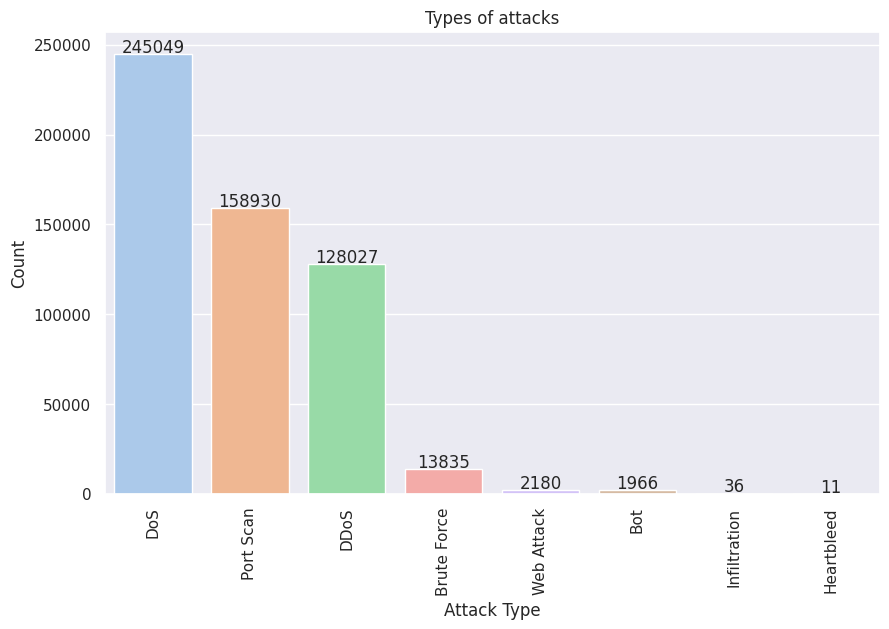

In [ ]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

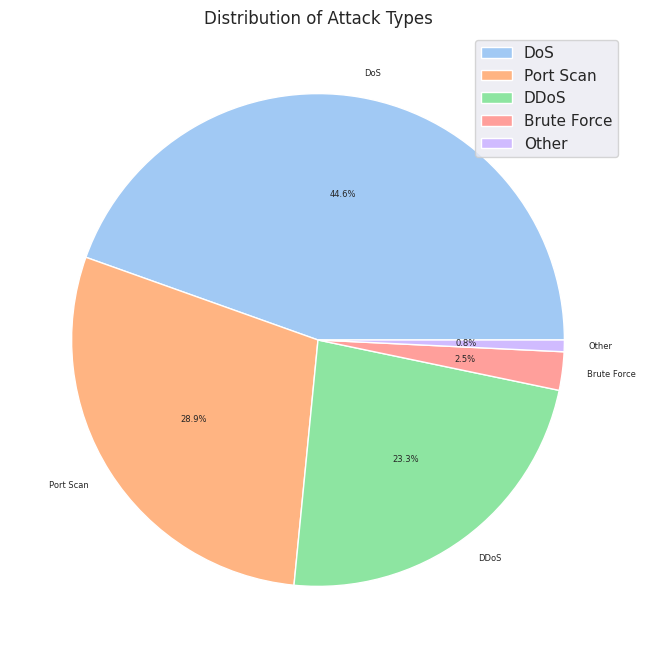

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
# Creating a boxplot for each attack type with the columns of sampled dataset
for attack_type in data['Attack Type'].unique():
    attack_data = data[data['Attack Type'] == attack_type]
    plt.figure(figsize=(20, 20))
    sns.boxplot(data = attack_data.drop(columns = ['Attack Type']), orient = 'h')
    plt.title(f'Boxplot of Features for Attack Type: {attack_type}')
    plt.xlabel('Feature Value')
    plt.show()

In [ ]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4,4,4,4.000000e+00,0.000000e+00,4,4,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,2217,2217,5024984.0,0.00000

## 3. Data Preprocessing

### Preprocessing

In [ ]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1363.75 MB


<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(np.float32)
<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(np.float32)
<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

Final memory usage: 698.92 MB


<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(np.float32)
<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(np.float32)
<ipython-input-34-df7e0886d128>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
# Calculating percentage reduction in memory usage
print(f'Reduced memory usage: {1 - (new_memory_usage / old_memory_usage):.2%}')

Reduced memory usage: 48.75%


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234367 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow Duration                float32
 1   Total Fwd Packets            float32
 2   Total Backward Packets       float32
 3   Total Length of Fwd Packets  float32
 4   Total Length of Bwd Packets  float32
 5   Fwd Packet Length Max        float32
 6   Fwd Packet Length Min        float32
 7   Fwd Packet Length Mean       float32
 8   Fwd Packet Length Std        float32
 9   Bwd Packet Length Max        float32
 10  Bwd Packet Length Min        float32
 11  Bwd Packet Length Mean       float32
 12  Bwd Packet Length Std        float32
 13  Flow Bytes/s                 float32
 14  Flow Packets/s               float32
 15  Flow IAT Mean                float32
 16  Flow IAT Std                 float32
 17  Flow IAT Max                 float32
 18  Flow IAT Min                 float32
 19  Fwd IA

In [ ]:
# List of columns to convert back to int32
columns_to_convert = [
    'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
    'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Max',
    'Bwd Packet Length Min', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
    'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Min Packet Length', 'Max Packet Length',
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
    'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Max', 'Active Min', 'Idle Max', 'Idle Min'
]

# Convert the specified columns to int32
for column in columns_to_convert:
    data[column] = data[column].astype('int32')

<ipython-input-36-b59921c6d619>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype('int32')
<ipython-input-36-b59921c6d619>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].astype('int32')
<ipython-input-36-b59921c6d619>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2234367 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow Duration                int32  
 1   Total Fwd Packets            int32  
 2   Total Backward Packets       int32  
 3   Total Length of Fwd Packets  int32  
 4   Total Length of Bwd Packets  int32  
 5   Fwd Packet Length Max        int32  
 6   Fwd Packet Length Min        int32  
 7   Fwd Packet Length Mean       float32
 8   Fwd Packet Length Std        float32
 9   Bwd Packet Length Max        int32  
 10  Bwd Packet Length Min        int32  
 11  Bwd Packet Length Mean       float32
 12  Bwd Packet Length Std        float32
 13  Flow Bytes/s                 float32
 14  Flow Packets/s               float32
 15  Flow IAT Mean                float32
 16  Flow IAT Std                 float32
 17  Flow IAT Max                 int32  
 18  Flow IAT Min                 int32  
 19  Fwd IA

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2522362.0,8.704762e+03,1.902507e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2522362.0,1.658132e+07,3.522426e+07,-1.300000e+01,208.000000,50577.000000,5.329717e+06,1.200000e+08
Total Fwd Packets,2522362.0,1.027627e+01,7.941738e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2522362.0,1.156596e+01,1.056594e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2522362.0,6.115751e+02,1.058499e+04,0.000000e+00,12.000000,66.000000,3.320000e+02,1.290000e+07
Total Length of Bwd Packets,2522362.0,1.813315e+04,2.397434e+06,0.000000e+00,6.000000,155.000000,9.880000e+02,6.554530e+08
Fwd Packet Length Max,2522362.0,2.310918e+02,7.561625e+02,0.000000e+00,6.000000,40.000000,2.020000e+02,2.482000e+04
Fwd Packet Length Min,2522362.0,1.919464e+01,6.079447e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2522362.0,6.347013e+01,1.955015e+02,0.000000e+00,6.000000,36.111111,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2522362.0,7.727757e+01,2.967953e+02,0.000000e+00,0.000000,0.000000,7.413914e+01,7.125597e+03


In [ ]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
data.shape

(2234367, 71)

In [ ]:
# Columns after removing non variant columns
data.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', '

- To improve performance and reduce the risk of memory-related errors (mostly session crashes), we downcasted the float and integer values based on the presence of the minimum and maximum values and reduced memory usage by 47.5%.

- The columns with zero standard deviation have the same value in all rows.
These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns. These columns cannot help differentiate between the classes or groups of data. So, we dropped the columns that have no variation.

In [ ]:
data.drop('Attack Type', axis = 1 , inplace=True)

In [ ]:
data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
0,4,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,1,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,609,7,4,484,414,233,0,69.14286,111.967896,207,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


### Applying PCA to reduce dimensions


A simple and effective way to reduce the dimensionality of the dataset and improve the performance of the model is to use strongly correlated features. We used label encoding on the target feature where the numerical values assigned to each category do not have inherent meaning and they are arbitrary. For this reason, the correlation matrix calculated using label-encoded variables may not accurately reflect the true relationships between the variables.

So, a more flexible approach to feature selection can be PCA. PCA is a technique that transforms original set of variables into a smaller set of uncorrelated variables, called principal components.

PCA can capture more complex relationships between variables that may not be evident from correlation matrix analysis. It can also help to reduce the risk of overfitting.

Here, we applied Incremental PCA. Incremental PCA is a variant of PCA that allows for the efficient computation of principal components of a large dataset that cannot be stored in memory.

We applied StandardScaler before performing Incremental PCA to standardize the data values into a standard format.


In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Number', axis = 1)
attacks = data['Attack Number']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.20%


In [ ]:
import joblib

# Save the scaler and Incremental PCA
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(ipca, 'ipca.pkl')

print("Preprocessing pipeline saved.")


Preprocessing pipeline saved.


In [ ]:
data.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,4.0,2.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188.0,6.0,03/07/2017 08:55:58,1.0,2.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80.0,192.168.10.14,49486.0,6.0,03/07/2017 08:56:22,3.0,2.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Load the scaler and Incremental PCA
scaler = joblib.load('scaler.pkl')
ipca = joblib.load('ipca.pkl')

In [ ]:
data.drop('Label', axis = 1, inplace = True)

In [ ]:
cleaned_data=pd.read_csv('/content/drive/MyDrive/SIEM_project/cleaned_CICIDS2017')

In [ ]:
data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
0,4,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,1,2,0,12,0,6,6,6.00000,0.000000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,609,7,4,484,414,233,0,69.14286,111.967896,207,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
import json
# Get column names as a list
columns = data.columns.tolist()

# Save to a JSON file
with open('columns.json', 'w') as file:
    json.dump(columns, file)


In [ ]:
with open('/content/drive/MyDrive/columns.txt', 'r') as file:
    columns = [line.strip() for line in file]


In [ ]:
columns

['Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Fwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',
 'CWE Flag Count',
 'ECE Flag Count',
 'Do

In [ ]:
data.to_csv('/content/drive/MyDrive/SIEM_project/cleaned_CICIDS2017')

In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Number'] = attacks.values

In [ ]:
# Save the scaler and PCA objects
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(ipca, 'ipca.pkl')

['ipca.pkl']

In [ ]:
new_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,Attack Number
0,-2.413279,-0.072254,0.540243,-0.221672,0.305700,5.074363,-0.087184,0.458903,0.769866,3.647944,...,-1.476949,0.201064,1.612777,-0.087501,-0.030564,-0.101496,-0.011824,0.037173,-0.036353,0
1,-3.117696,-0.102330,0.946275,-0.441500,0.568614,14.855107,-0.334696,1.835610,4.746431,18.517852,...,-1.225075,0.802697,2.573639,-0.150756,0.195665,0.138007,-0.034688,0.109619,-0.256890,0
2,-2.491644,-0.075671,0.585797,-0.246672,0.333756,6.161294,-0.114832,0.610379,1.212816,5.299972,...,-1.446557,0.266580,1.721182,-0.094624,-0.006166,-0.074982,-0.014389,0.044941,-0.060651,0
3,-3.117792,-0.102406,0.946715,-0.442075,0.567457,14.855289,-0.334843,1.834119,4.747541,18.517668,...,-1.222669,0.801364,2.575282,-0.150851,0.194926,0.137909,-0.034712,0.109338,-0.256684,0
4,-1.672399,0.087287,-0.485631,0.484069,0.800230,-0.086504,0.105581,0.854430,-1.123756,0.257439,...,0.605173,-0.599781,0.950659,-0.056666,-0.167681,0.281508,-0.032918,-0.080418,0.010373,0


In [ ]:
new_data.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,Attack Number
2234362,-2.290812,-0.069420,0.421922,-0.451797,0.570491,4.301753,-0.065236,0.442677,0.690000,3.975033,...,0.049871,-0.186454,-0.422604,0.010070,-0.379561,-0.025444,0.007827,-0.066535,0.024545,0
2234363,-2.283469,-0.063376,0.419487,-0.203724,0.121566,2.462811,-0.028188,0.012677,-0.232508,-0.103223,...,-0.816895,0.054940,0.849801,-0.043750,-0.052043,-0.014230,-0.010562,0.014448,0.002445,0
2234364,-2.242784,-0.062813,0.403818,-0.202072,0.086522,2.062276,-0.021498,-0.048873,-0.326164,-0.670897,...,-0.841634,0.081801,0.880135,-0.045556,-0.046700,0.003646,-0.012292,0.014233,0.003051,0
2234365,-2.085076,-0.054337,0.286644,-0.333156,0.446567,1.294046,0.009123,0.064365,-0.454575,-0.423589,...,-0.212754,-0.312240,-0.807338,0.037023,-0.323072,-0.157062,0.020915,-0.079494,0.087530,0
2234366,-2.353185,-0.027234,0.300834,0.202522,0.847607,2.357971,0.067575,0.730177,-1.372591,-0.953182,...,-0.959615,0.444302,-0.227027,0.020827,0.150524,-0.398680,0.033577,-0.047280,-0.012401,0


In [ ]:
new_data.to_csv('/content/drive/MyDrive/SIEM_project/Pre_Processed_CICIDS2017')